# Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('sexism_dataset.csv')

In [3]:
data.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


# Data Preprocessing

In [4]:
columns_to_remove = ['rewire_id', 'label_category', 'label_vector']
data = data.drop(columns_to_remove, axis=1)

data.head()

,text,label_sexist
0,"Damn, this writing was pretty chaotic",not sexist
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist
2,How the FUCK is this woman still an MP!!!???,not sexist
3,Understand. Know you're right. At same time I ...,not sexist
4,Surprized they didn't stop and rape some women,not sexist


In [5]:
data['text'] = data['text'].str.replace('\[URL\]', '', regex=True)

# Data Visualization

not sexist    10602
sexist         3398
Name: label_sexist, dtype: int64
Proportion: 3.12 : 1


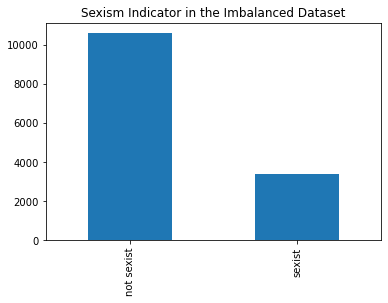

In [6]:
count = data['label_sexist'].value_counts()
print(count)
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='Sexism Indicator in the Imbalanced Dataset');

Most common words in texts which are Not Sexist

In [7]:
import matplotlib.font_manager as fm

# Specify the font to use
font_path = 'arial.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Separate sexist and not sexist examples
sexist_examples = data[data['label_sexist'] == 'sexist']['text']
not_sexist_examples = data[data['label_sexist'] == 'not sexist']['text']

# Create word clouds for not sexist examples
not_sexist_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, font_path=font_path).generate(' '.join(not_sexist_examples))
plt.figure(figsize=(8,8))
plt.imshow(not_sexist_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most common words in texts which are Sexist

In [8]:
# create word clouds for sexist examples
sexist_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(sexist_examples))
plt.figure(figsize=(8,8))
plt.imshow(sexist_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Balancing the Dataset

In [9]:
# Split the data into two subsets based on the "label_sexist" column
sexist_examples = data[data['label_sexist'] == 'sexist']
not_sexist_examples = data[data['label_sexist'] == 'not sexist']

# Determine the size of the minority and majority classes
minority_size = len(sexist_examples)
majority_size = len(not_sexist_examples)

# Compute the oversampling ratio
oversampling_ratio = int(majority_size / minority_size)

# Oversample the minority class by duplicating examples
oversampled_sexist_examples = sexist_examples.sample(n=minority_size * oversampling_ratio, replace=True)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([not_sexist_examples, oversampled_sexist_examples])

# Shuffle the rows of the data to avoid any bias
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

No. of "Not Sexist" examples in the Balanced Dataset: 10602
No. of "Sexist" examples in the Balanced Dataset: 10194
Ratio of "Not Sexist" to "Sexist" in the Balanced Dataset: 1.04 : 1


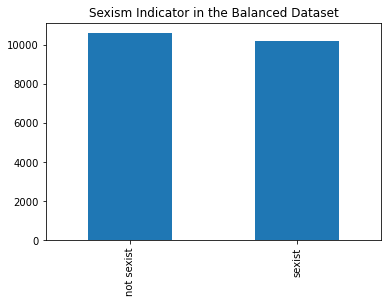

In [10]:
count = balanced_data['label_sexist'].value_counts()
print('No. of "Not Sexist" examples in the Balanced Dataset:', count[0])
print('No. of "Sexist" examples in the Balanced Dataset:', count[1])
print('Ratio of "Not Sexist" to "Sexist" in the Balanced Dataset:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='Sexism Indicator in the Balanced Dataset');

Train-Test Split

In [11]:
x = np.array(balanced_data["text"])
y = np.array(balanced_data["label_sexist"])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)

# Decision Tree

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# test_data = "she is bad"
# data = cv.transform([test_data]).toarray()
# print(dt.predict(data))

In [14]:
y_test_prediction_dt = dt.predict(X_test)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_test)

predicted_labels_dt = le.transform(y_test_prediction_dt)
actual_labels = le.transform(y_test)

In [16]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

print('Decison Tree Accuracy Measures:')
print('F1 Score:', f1_score(actual_labels, predicted_labels_dt))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_dt))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_dt))
print('Precision:', precision_score(actual_labels, predicted_labels_dt))
print('Recall:', recall_score(actual_labels, predicted_labels_dt))

Decison Tree Accuracy Measures:
F1 Score: 0.9019970414201184
AUC-ROC: 0.899092084491463
Accuracy: 0.8980573187151375
Precision: 0.8539915966386554
Recall: 0.9557210031347962


Confusion Matrix

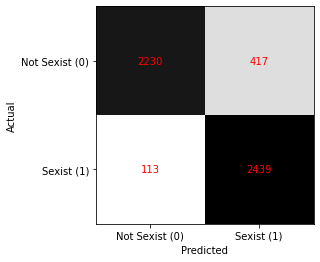

In [17]:
# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_dt)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the matrix
labels = ["Not Sexist (0)", "Sexist (1)"]

# Create the plot and add labels
plt.imshow(cm, cmap="binary")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="red")

# Show the plot
plt.show()

ROC Curve

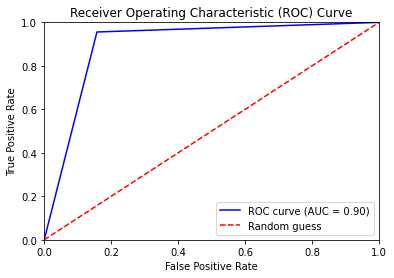

In [18]:
from sklearn.metrics import roc_curve, auc

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_dt)

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Create the plot and add labels
plt.plot(fpr, tpr, color="blue", label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random guess")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

# Show the plot
plt.show()

 Precision-Recall Curve

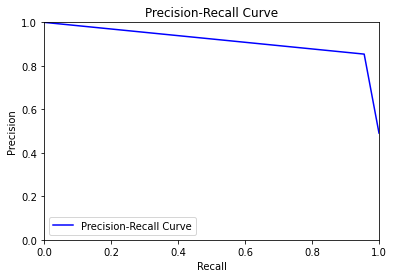

In [19]:
from sklearn.metrics import precision_recall_curve

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_dt)

# Compute the precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Create the plot and add labels
plt.plot(recall, precision, color="blue", label="Precision-Recall Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")

# Show the plot
plt.show()

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_test_prediction_lr = lr.predict(X_test)

In [22]:
predicted_labels_lr = le.transform(y_test_prediction_lr)

In [23]:
print('Logistic Regression Accuracy Measures:')
print('F1 Score:', f1_score(actual_labels, predicted_labels_lr))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_lr))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_lr))
print('Precision:', precision_score(actual_labels, predicted_labels_lr))
print('Recall:', recall_score(actual_labels, predicted_labels_lr))

Logistic Regression Accuracy Measures:
F1 Score: 0.893730886850153
AUC-ROC: 0.8934706647260221
Accuracy: 0.8930563569917291
Precision: 0.8723880597014926
Recall: 0.9161442006269592


Confusion Matrix

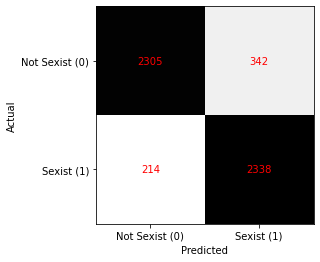

In [24]:
# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_lr)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the matrix
labels = ["Not Sexist (0)", "Sexist (1)"]

# Create the plot and add labels
plt.imshow(cm, cmap="binary")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="red")

# Show the plot
plt.show()

ROC Curve

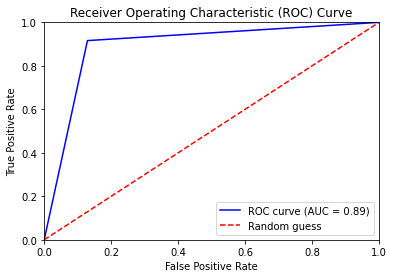

In [25]:
from sklearn.metrics import roc_curve, auc

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_lr)

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Create the plot and add labels
plt.plot(fpr, tpr, color="blue", label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random guess")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

# Show the plot
plt.show()

Precison-Recall Curve

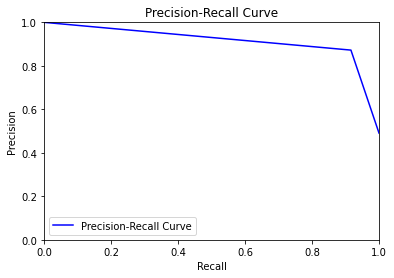

In [26]:
from sklearn.metrics import precision_recall_curve

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_lr)

# Compute the precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Create the plot and add labels
plt.plot(recall, precision, color="blue", label="Precision-Recall Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")

# Show the plot
plt.show()

# SVM

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
y_test_prediction_svc = svc.predict(X_test)

In [29]:
predicted_labels_svc = le.transform(y_test_prediction_svc)

In [30]:
print('SVM Accuracy Measures:')
print('F1 Score:', f1_score(actual_labels, predicted_labels_svc))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_svc))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_svc))
print('Precision:', precision_score(actual_labels, predicted_labels_svc))
print('Recall:', recall_score(actual_labels, predicted_labels_svc))

SVM Accuracy Measures:
F1 Score: 0.8947763998496805
AUC-ROC: 0.8930174545501917
Accuracy: 0.892286978265051
Precision: 0.8595667870036101
Recall: 0.9329937304075235


Confusion Matrix

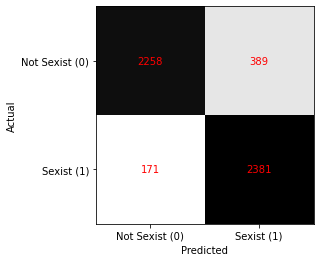

In [31]:
# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_svc)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the matrix
labels = ["Not Sexist (0)", "Sexist (1)"]

# Create the plot and add labels
plt.imshow(cm, cmap="binary")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="red")

# Show the plot
plt.show()

ROC Curve

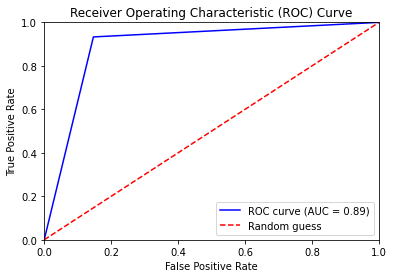

In [32]:
from sklearn.metrics import roc_curve, auc

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_svc)

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Create the plot and add labels
plt.plot(fpr, tpr, color="blue", label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random guess")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

# Show the plot
plt.show()

Precison-Recall Curve

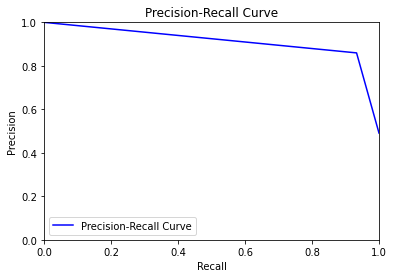

In [33]:
from sklearn.metrics import precision_recall_curve

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_svc)

# Compute the precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Create the plot and add labels
plt.plot(recall, precision, color="blue", label="Precision-Recall Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")

# Show the plot
plt.show()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_test_prediction_rf = rf.predict(X_test)

In [37]:
predicted_labels_rf = le.transform(y_test_prediction_rf)

In [38]:
print('Random Forest Accuracy Measures:')
print('F1 Score:', f1_score(actual_labels, predicted_labels_rf))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_rf))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_rf))
print('Precision:', precision_score(actual_labels, predicted_labels_rf))
print('Recall:', recall_score(actual_labels, predicted_labels_rf))

Random Forest Accuracy Measures:
F1 Score: 0.9487027134085958
AUC-ROC: 0.9499727170878962
Accuracy: 0.950182727447586
Precision: 0.9591509811774129
Recall: 0.9384796238244514


Confusion Matrix

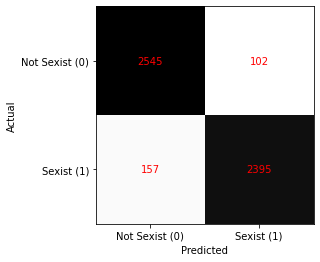

In [39]:
# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_rf)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the matrix
labels = ["Not Sexist (0)", "Sexist (1)"]

# Create the plot and add labels
plt.imshow(cm, cmap="binary")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="red")

# Show the plot
plt.show()

ROC Curve

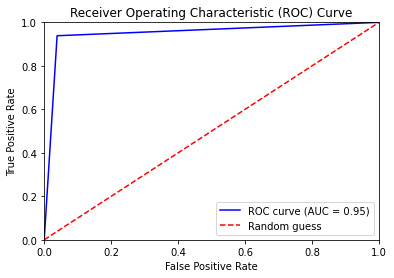

In [40]:
from sklearn.metrics import roc_curve, auc

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_rf)

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Create the plot and add labels
plt.plot(fpr, tpr, color="blue", label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random guess")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

# Show the plot
plt.show()

Precison-Recall Curve

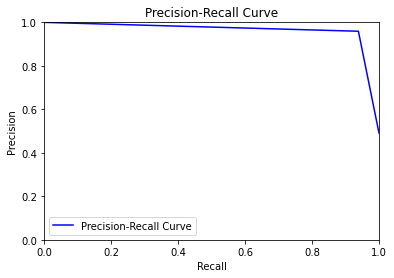

In [41]:
from sklearn.metrics import precision_recall_curve

# Define the actual labels and predicted values
y_true = np.array(actual_labels)
y_pred = np.array(predicted_labels_rf)

# Compute the precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Create the plot and add labels
plt.plot(recall, precision, color="blue", label="Precision-Recall Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")

# Show the plot
plt.show()